In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [46]:
data = pd.read_csv('https://raw.githubusercontent.com/prathameshks/ML-From-Scratch/main/MNIST_DATA/train.csv')

In [47]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into test and training sets

data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [48]:
print(f"{X_train.shape = }")
print(f"{X_test.shape = }")
print(f"{Y_train.shape = }")
print(f"{Y_test.shape = }")

X_train.shape = (784, 41000)
X_test.shape = (784, 1000)
Y_train.shape = (41000,)
Y_test.shape = (1000,)


In [2]:
class NeuralNetwork:
    def __init__(self):
        self.w1 = np.random.rand(10, 784) - 0.5
        self.b1 = np.random.rand(10, 1) - 0.5
        self.w2 = np.random.rand(10, 10) - 0.5
        self.b2 = np.random.rand(10, 1) - 0.5

    def ReLU(self, x):
        return np.maximum(0, x)

    def softMax(self, x):
        # limit overflow
        exp_x = np.exp(np.maximum(x, -60))  # Clip values to prevent overflow
        sum_exp_x = np.sum(exp_x, axis=0)
        return exp_x / sum_exp_x

    def forward_prop(self, X):
        z1 = self.w1.dot(X) + self.b1
        a1 = self.ReLU(z1)
        z2 = self.w2.dot(a1) + self.b2
        a2 = self.softMax(z2)

        return z1,a1,z2,a2

    def one_hot(self,y):
        one_hot_y = np.zeros((y.size , y.max() + 1))
        one_hot_y[np.arange(y.size) , y] = 1
        one_hot_y = one_hot_y.T
        return one_hot_y

    def deriv_ReLU(self,x):
        return x>0

    def back_prop(self, z1, a1, z2, a2,x, y):
        one_hot_y = self.one_hot(y)
        dz2 = a2-one_hot_y
        dw2 = 1/ m * dz2.dot(a1.T)
        db2 = 1 / m * np.sum(dz2)

        dz1 = self.w2.T.dot(dz2) * self.deriv_ReLU(z1)
        dw1 = 1 / m * dz1.dot(x.T)
        db1 = 1 / m * np.sum(dz1)

        return dw1,db1,dw2,db2

    def update_params(self, dw1,db1,dw2,db2,alpha):
        self.w1 = self.w1 - alpha*dw1
        self.b1 = self.b1 - alpha*db1
        self.w2 = self.w2 - alpha*dw2
        self.b2 = self.b2 - alpha*db2

    def get_predictions(self, a2):
        return np.argmax(a2, 0)

    def get_accuracy(self, predictions, y):
        # print(predictions, y)
        return np.sum(predictions == y) / y.size

    def gradient_decent(self,x,y,iterations,alpha):
        for i in range(iterations):
            z1,a1,z2,a2 = self.forward_prop(x)
            dw1,db1,dw2,db2 = self.back_prop(z1,a1,z2,a2,x,y)
            self.update_params(dw1,db1,dw2,db2,alpha)
            if(i % 50 == 0):
                print("Iteration: ",i)
                predictions = self.get_predictions(a2)
                print("Accuracy: ",self.get_accuracy(predictions,y))
    

    def make_predictions(self,x):
        _,_,_,a2 = self.forward_prop(x)
        predictions = self.get_predictions(a2)
        return predictions

    def show_training_predictions(self,index,x,y):
        cur_img = x[:,index,None]
        np.save("img.txt",cur_img)
        prediction = self.make_predictions(cur_img)
        print("Prediction: ", prediction)
        print("Label: ", y[index])
        cur_img = cur_img.reshape((28,28))
        plt.imshow(cur_img, cmap='gray')
        plt.show()

    def save(self,file="digit_model.npz"):
        np.savez(file, w1=self.w1, b1=self.b1, w2=self.w2, b2=self.b2)
        
    def load(self,file="digit_model.npz"):
        npz = np.load(file)
        self.w1 = npz['w1']
        self.b1 = npz['b1']
        self.w2 = npz['w2']
        self.b2 = npz['b2']

In [50]:
# get testing accuracy

def get_accuracy(predictions, y):
    print(predictions, y)
    return np.sum(predictions == y) / y.size


In [3]:
model = NeuralNetwork()

In [4]:
model.load()

In [70]:
# training
model.gradient_decent(X_train, Y_train, 101, 0.25)


Iteration:  0
[2 8 0 ... 3 2 8] [7 8 0 ... 5 2 8]
Accuracy:  0.8768536585365854
Iteration:  50
[2 8 0 ... 3 2 8] [7 8 0 ... 5 2 8]
Accuracy:  0.8806341463414634
Iteration:  100
[2 8 0 ... 5 2 8] [7 8 0 ... 5 2 8]
Accuracy:  0.876780487804878


In [75]:
model.save()

In [71]:
# test accuracy
predictions = model.make_predictions(X_test)
print("Accuracy: ",get_accuracy(predictions,Y_test))

[4 0 9 3 6 3 6 9 7 3 6 9 7 8 1 0 7 1 6 4 8 8 2 1 4 5 0 8 8 3 9 3 2 1 0 6 5
 0 8 8 8 1 6 2 4 3 8 9 7 4 4 7 0 6 1 3 5 1 9 5 5 3 1 2 5 4 2 5 6 3 3 1 6 9
 2 7 3 0 4 6 9 1 5 5 7 9 7 6 9 8 8 1 4 8 3 7 6 5 7 2 4 6 7 1 8 8 1 2 3 5 8
 6 9 8 9 5 6 1 9 8 7 9 5 6 2 8 6 4 7 7 0 0 7 0 1 7 8 9 5 2 1 0 6 0 8 2 1 0
 2 1 2 1 6 9 3 3 4 1 1 1 0 0 4 1 4 0 1 7 4 4 2 9 9 3 8 3 6 8 6 7 4 1 6 1 0
 7 1 0 1 0 5 7 1 6 4 0 9 9 7 5 3 8 5 4 1 5 6 7 7 1 4 1 1 3 9 4 0 2 9 3 9 8
 2 6 5 9 9 7 1 3 5 4 0 7 1 4 2 3 7 3 8 1 5 1 2 3 4 1 0 1 1 7 7 7 1 5 1 7 2
 9 3 3 7 2 3 1 1 1 2 8 1 8 6 8 4 6 6 7 0 4 2 0 8 8 9 0 3 1 6 1 1 1 9 3 3 7
 8 9 9 7 0 0 9 7 8 8 0 5 5 3 4 3 9 3 5 1 8 3 9 4 6 1 4 8 2 1 0 1 0 9 7 1 4
 8 4 8 3 1 9 5 6 8 6 5 1 3 6 9 0 5 4 8 7 0 6 9 9 3 8 2 6 4 7 3 5 7 8 9 6 9
 0 0 7 3 1 1 3 9 1 2 8 1 9 6 4 6 0 0 3 3 6 1 9 1 1 2 6 7 0 6 3 4 4 4 1 5 7
 9 6 3 1 7 3 1 4 0 5 2 6 3 4 2 7 9 3 9 0 9 3 0 0 7 6 3 9 6 5 8 8 9 6 5 1 4
 3 4 7 8 8 5 8 0 2 7 5 0 4 4 5 6 0 0 8 0 7 0 9 1 2 6 4 2 4 0 7 5 8 9 1 7 8
 7 9 3 8 7 5 6 9 8 2 2 2 

Prediction:  [3]
Label:  3


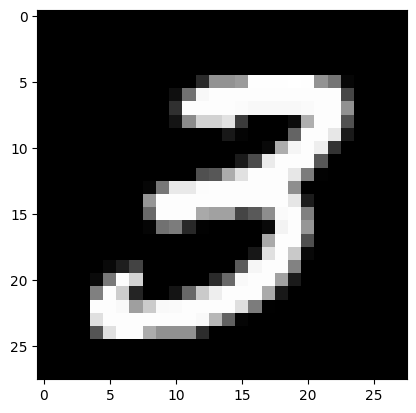

In [83]:
model.show_training_predictions(104,X_train,Y_train)

In [16]:
import pygame
import math

# Initialize pygame
pygame.init()

# Set up the display
screen_size = (280, 280)  # 28x28 pixels scaled up
screen = pygame.display.set_mode(screen_size)
pygame.display.set_caption("Pixel Drawing Board")

# Colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
GRAY = (200, 200, 200)

# Initialize the drawing surface (all black pixels)
drawing_surface = pygame.Surface((28, 28))
drawing_surface.fill(BLACK)

# Main loop
drawing = False
loop = True
while loop:
    for event in pygame.event.get():
        if event.type == pygame.QUIT or (event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE):
            loop = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            drawing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            drawing = False
        elif event.type == pygame.MOUSEMOTION and drawing:
            x, y = event.pos
            # Calculate pixel coordinates
            pixel_x, pixel_y = x // 10, y // 10
            # Draw the cursor pixel in white
            pygame.draw.rect(drawing_surface, WHITE, (pixel_x, pixel_y, 1, 1))
            # Adjust nearby pixels based on distance
            continue
            for dx in range(-1, 2):
                for dy in range(-1, 2):
                    dist = math.sqrt(dx**2 + dy**2)
                    if dist <= 2:
                        shade = int(255 - 100 * dist)  # Vary the shade
                        # get the shade of pixel at (pixel_x + dx, pixel_y + dy)
                        shade_old = drawing_surface.get_at((pixel_x + dx, pixel_y + dy))[0]
                        # set shade to max of (shade, shade_old)
                        shade = max(shade, shade_old)                        
                        pygame.draw.rect(drawing_surface, (shade, shade, shade), (pixel_x + dx, pixel_y + dy, 1, 1))

    # Draw the drawing surface on the screen
    pygame.transform.scale(drawing_surface, screen_size, screen)
    pygame.display.flip()

drawing_array = np.array(pygame.surfarray.array2d(drawing_surface))

# Normalize pixel values to [0, 1]
drawing_array_normalized = drawing_array.astype(float) / 256.0**3
# round to 2 decimal places
drawing_array_normalized = np.round(drawing_array_normalized, 2)

# Flatten the 28x28 grid into a 1D array
flattened_array = drawing_array_normalized.flatten()

# Clean up
pygame.quit()


In [17]:
# convert numpy array [1,2,3,...] to [[1,],[2,],[3,],...]
flattened_array2 = flattened_array.reshape(-1, 1)

In [18]:

# predict
prediction = model.make_predictions(flattened_array2)
print("Prediction: ", prediction)


Prediction:  [7]


In [85]:
img = np.load("img.txt.npy")
img

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   